DATA SCIENCE INTERNSHIP AT OASIS INFOBYTE PROJECT TITLE:CAR PRICE PREDICTION TASK NO:3

NAME:RANJANI T

import library

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Read the data

In [76]:
df=pd.read_csv('car data.csv')

In [77]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [78]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [79]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


Explore the data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
df.shape

(301, 9)

In [82]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [83]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [84]:
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [85]:
print(df.Selling_type.value_counts())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [86]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [87]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

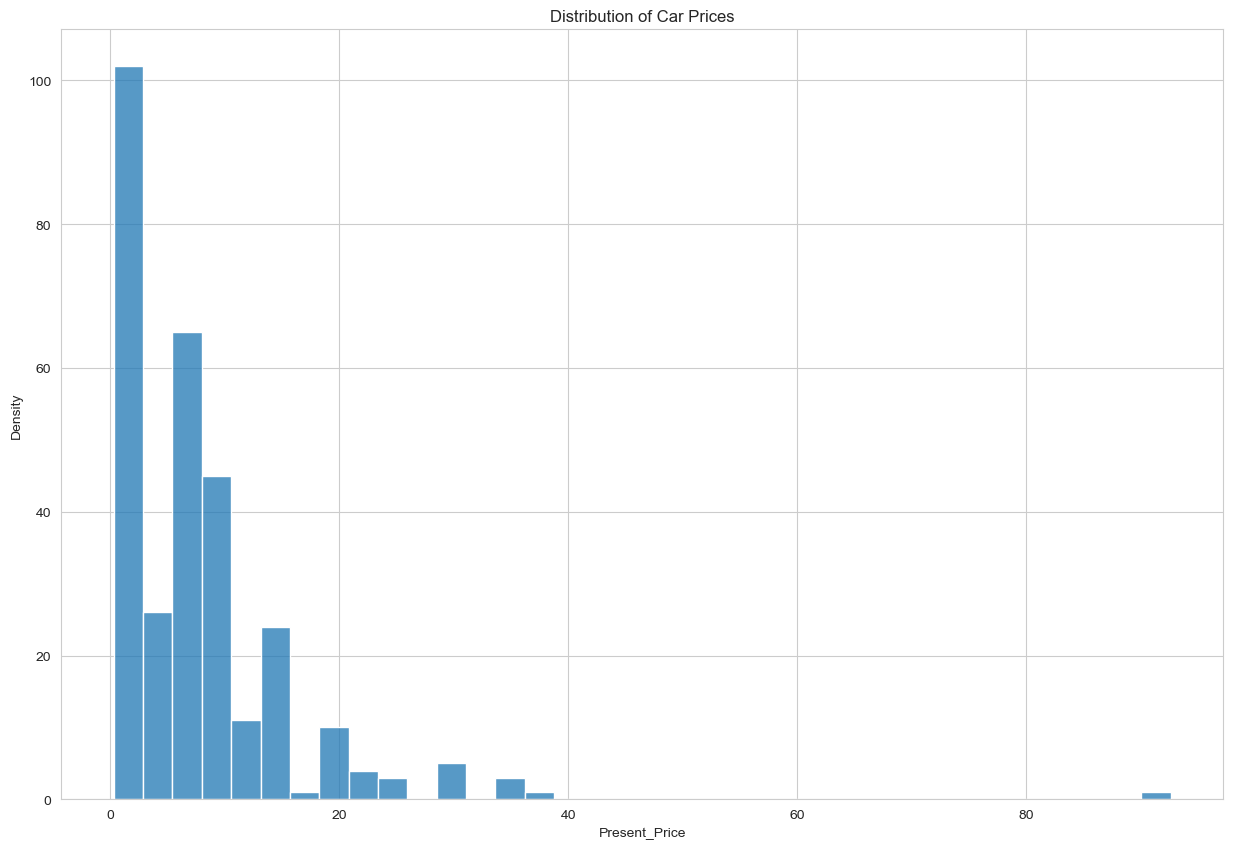

In [88]:
price_column = "Present_Price"  
price_data = df[price_column]
# Set chart style and size
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.histplot(price_data)
plt.title("Distribution of Car Prices")
plt.xlabel(price_column)
plt.ylabel("Density")
plt.show()

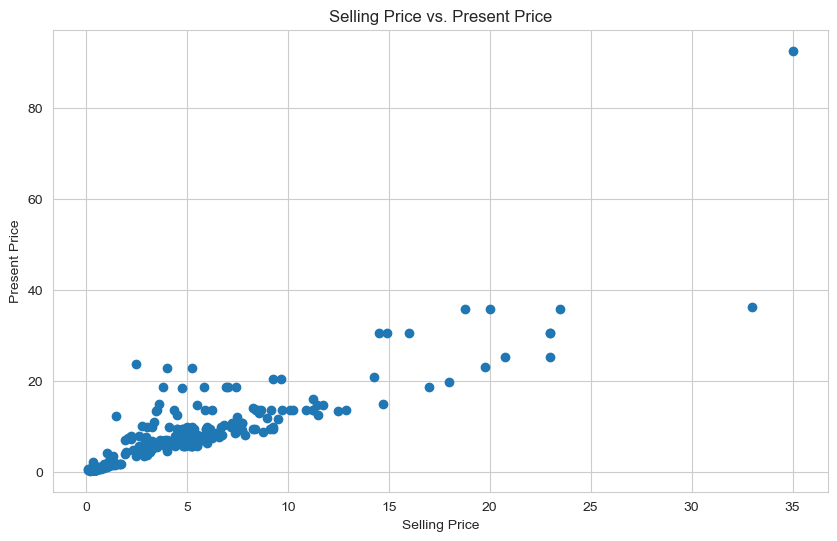

In [89]:
selling_price = df["Selling_Price"]
present_price = df["Present_Price"]
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selling_price, present_price)
plt.title("Selling Price vs. Present Price")
plt.xlabel("Selling Price")
plt.ylabel("Present Price")
plt.show()

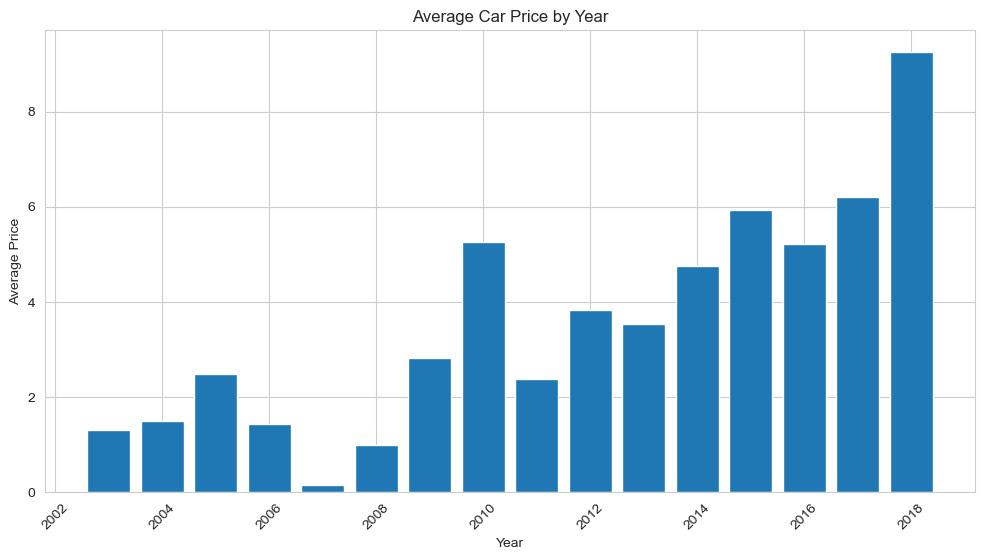

In [90]:
price_column = "Selling_Price" 
average_price_per_year = df.groupby('Year')[price_column].mean()
years = average_price_per_year.index.to_numpy()
average_prices = average_price_per_year.to_numpy()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, average_prices)

plt.title("Average Car Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.xticks(rotation=45) 
# Show the plot
plt.show()

In [91]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [92]:
y=df['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)


In [94]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics
linear_reg=LinearRegression()

In [95]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred=linear_reg.predict(X_train)

In [102]:
error_score=metrics.r2_score(y_train,y_pred)
print("R Squaared Error ",error_score)

R Squaared Error  0.8689344719677026


In [110]:
x_pred=linear_reg.predict(X_test)

In [113]:
error_score=metrics.r2_score(y_test,x_pred)
print("R Squaared Error ",error_score)

R Squaared Error  0.9408489618706803


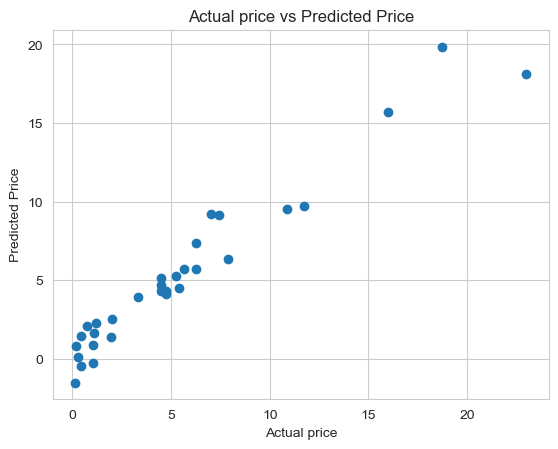

In [108]:
plt.scatter(y_test,x_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()